<h1>Regresion lineal multiple</h1>

<h4>imports</h4>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/ezequieldjemdjemian/Documents/github/FIUBA_MachineLearning/Módulo 02 - Regresión Lineal Simple/Datasets/Aptos_BsAs_Todos.csv')

<h2>Entendiendo el dataset</h2>

In [7]:
df.head()

,tipo,Barrio,cant_hab,cant_bath,superficie,precio
0,Casa,Velez Sarsfield,3,2,95,199900
1,Departamento,Nuñez,1,1,44,147000
2,Departamento,Almagro,1,1,40,92294
3,Departamento,Almagro,1,1,49,115000
4,Departamento,Almagro,1,1,40,77000


el dataset tiene 6 columnas. 
45904 registros.
la variable a predecir es 'precio' :: int64
las variables predictoras son: tipo, barrio, cant_hab, cant_bath y superficie

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45904 entries, 0 to 45903
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tipo        45904 non-null  object
 1   Barrio      45904 non-null  object
 2   cant_hab    45904 non-null  int64 
 3   cant_bath   45904 non-null  int64 
 4   superficie  45904 non-null  int64 
 5   precio      45904 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.1+ MB


In [18]:
set(df['tipo'])
set(df['Barrio'])

{'Abasto',
 'Agronomía',
 'Almagro',
 'Balvanera',
 'Barracas',
 'Barrio Norte',
 'Belgrano',
 'Boca',
 'Boedo',
 'Caballito',
 'Catalinas',
 'Centro / Microcentro',
 'Chacarita',
 'Coghlan',
 'Colegiales',
 'Congreso',
 'Constitución',
 'Flores',
 'Floresta',
 'Las Cañitas',
 'Liniers',
 'Mataderos',
 'Monserrat',
 'Monte Castro',
 'Nuñez',
 'Once',
 'Palermo',
 'Parque Avellaneda',
 'Parque Centenario',
 'Parque Chacabuco',
 'Parque Chas',
 'Parque Patricios',
 'Paternal',
 'Pompeya',
 'Puerto Madero',
 'Recoleta',
 'Retiro',
 'Saavedra',
 'San Cristobal',
 'San Nicolás',
 'San Telmo',
 'Tribunales',
 'Velez Sarsfield',
 'Versalles',
 'Villa Crespo',
 'Villa Devoto',
 'Villa General Mitre',
 'Villa Lugano',
 'Villa Luro',
 'Villa Ortuzar',
 'Villa Pueyrredón',
 'Villa Real',
 'Villa Riachuelo',
 'Villa Santa Rita',
 'Villa Soldati',
 'Villa Urquiza',
 'Villa del Parque'}

In [ ]:
set(df['tipo'])
set(df['Barrio'])

In [20]:
df.describe()

,cant_hab,cant_bath,superficie,precio
count,45904.000000,45904.000000,45904.000000,45904.00000
mean,2.717911,1.424102,79.789147,214393.81335
std,1.187498,0.690681,46.656302,140713.24915
min,1.000000,1.000000,28.000000,69500.00000
25%,2.000000,1.000000,46.000000,120000.00000
50%,3.000000,1.000000,65.000000,169000.00000
75%,3.000000,2.000000,99.000000,259000.00000
max,8.000000,5.000000,320.000000,950000.00000


<h2>Inspeccion visual de los datos</h2>

<AxesSubplot:xlabel='cant_hab', ylabel='precio'>

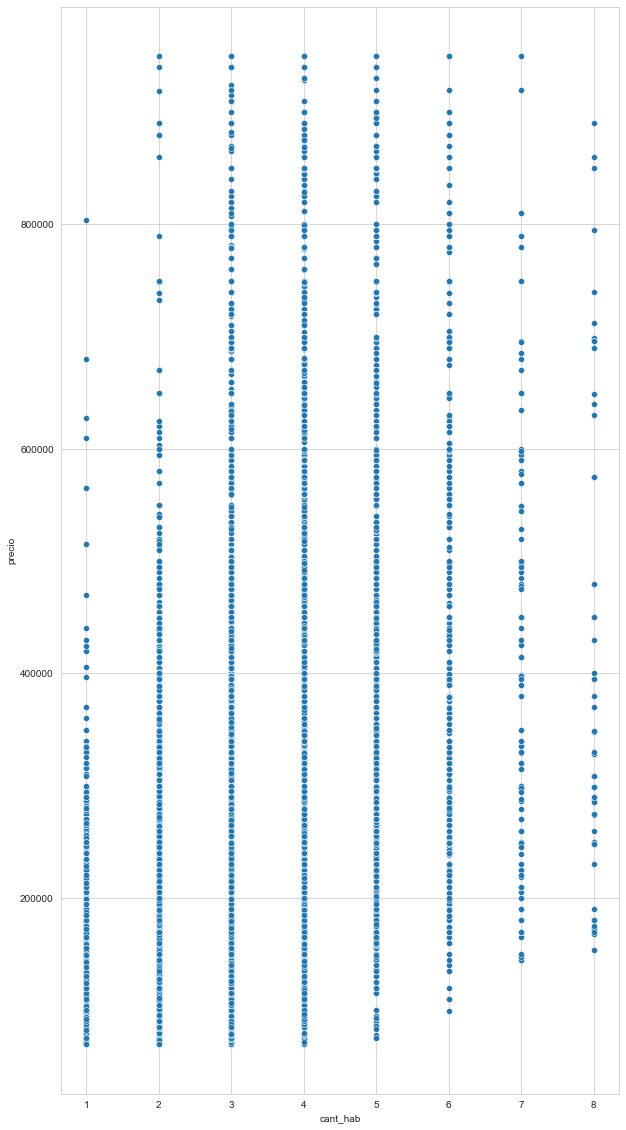

In [35]:
sns.set_style('whitegrid')

fig, ax = plt.subplots (figsize=(10,20))

sns.scatterplot(x='cant_hab', y='precio', data=df, ax=ax)

<h3>Analiticas representando 3 dimensiones</h3>

<AxesSubplot:xlabel='superficie', ylabel='precio'>

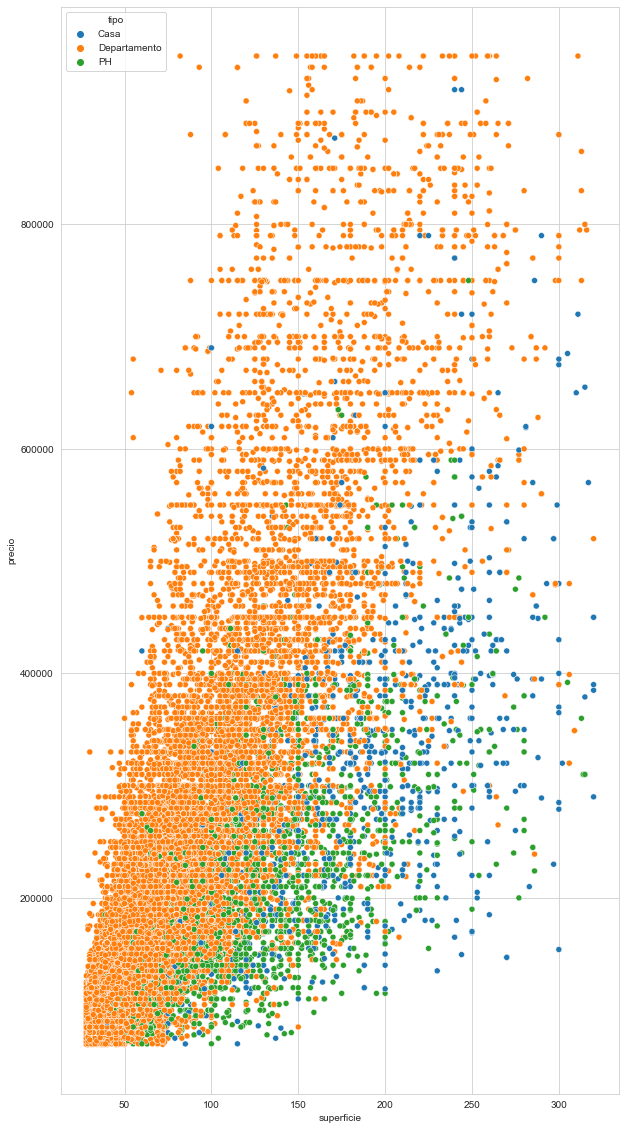

In [37]:
fig, ax = plt.subplots(figsize=(10,20))

sns.scatterplot(x='superficie', y='precio', hue='tipo', data=df, ax=ax)

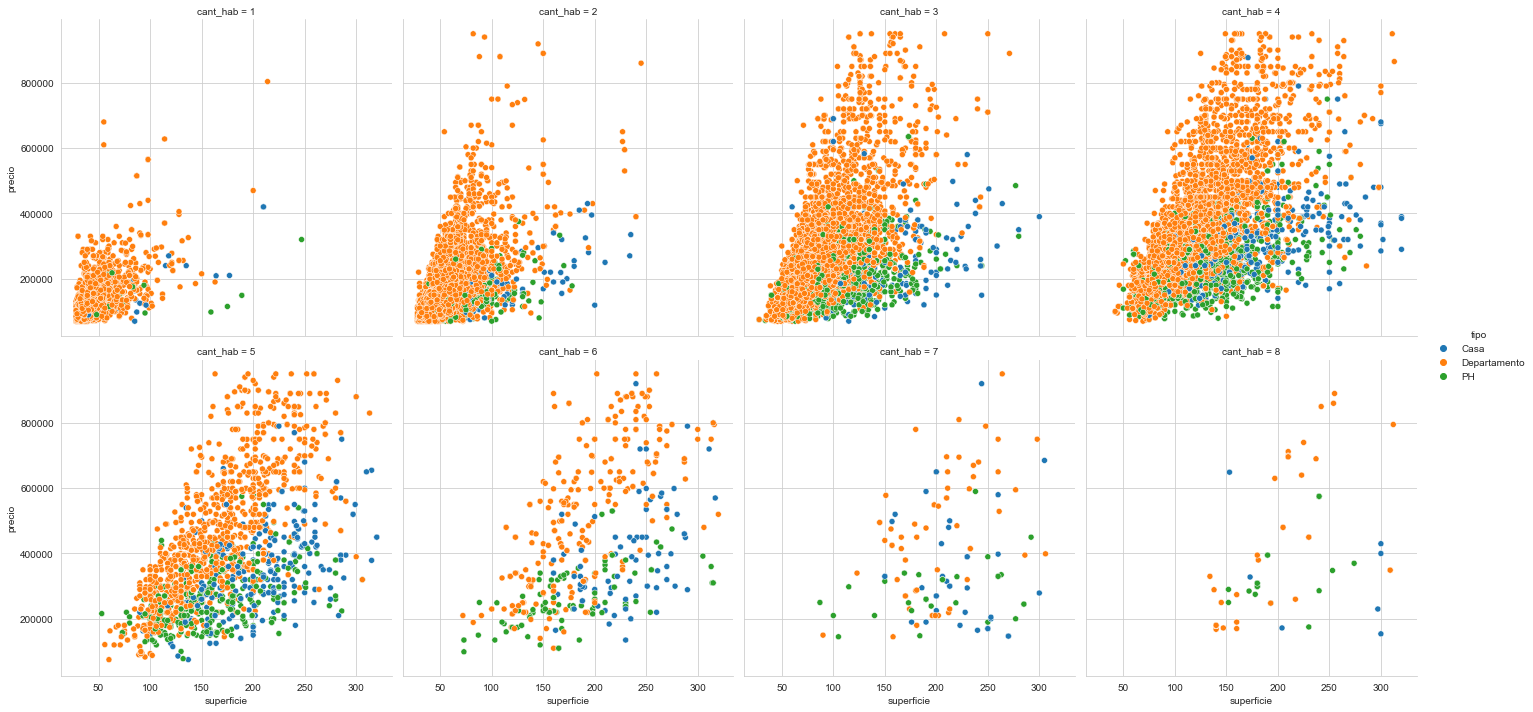

In [41]:
sns.relplot(x='superficie', y='precio', data=df, hue='tipo', kind='scatter', col='cant_hab', col_wrap=4)

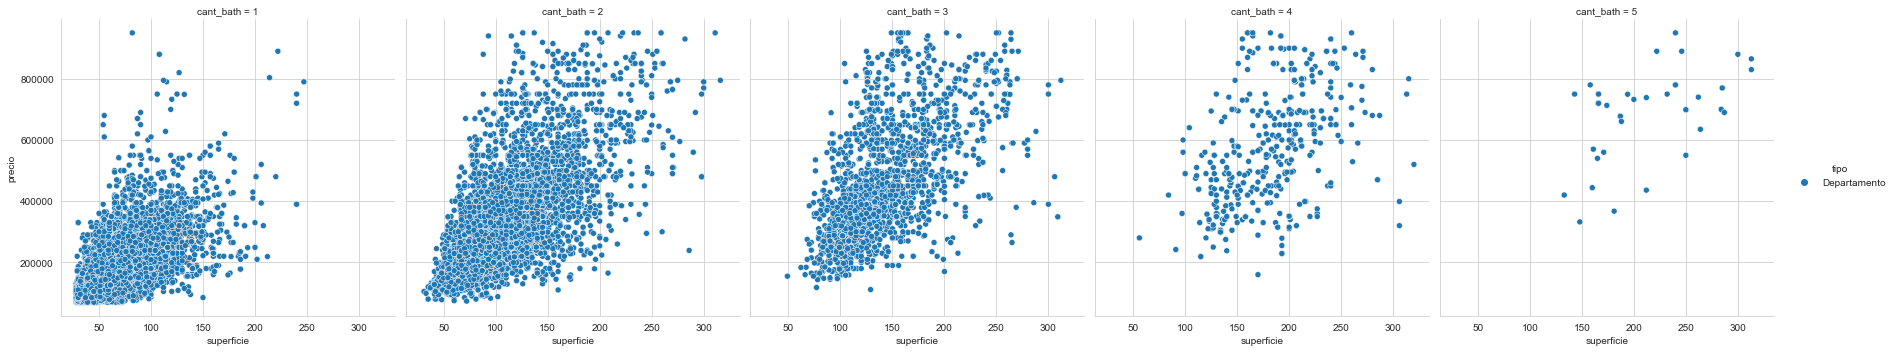

In [44]:
sns.relplot(x='superficie', y='precio', data=df[df['tipo']=='Departamento'], hue='tipo', kind='scatter', col='cant_bath', col_wrap=5)

<h2>Regresion Lineal Simple</h2>

In [28]:
import statsmodels.formula.api as smf

In [34]:
model = smf.ols('precio ~ superficie', data=df[df['Barrio']=='Recoleta']).fit()
#model = smf.ols('precio ~ superficie', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:50:52   Log-Likelihood:                -32404.
No. Observations:                2554   AIC:                         6.481e+04
Df Residuals:                    2552   BIC:                         6.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.744e+04   3182.993      8.622      0.0

In [48]:
print("la ecuacion de la rl es: y' = "+str(model.params[0])+ " + " + str(model.params[1]) + " * x " )

la ecuacion de la rl es: y' = 27442.947319239764 + 2909.469425318157 * x 


<h4>Graficamos la recta</h4>

In [53]:
#voy a filtrar el df, en donde barrio=recoleta
#cabe aclarar, que esta aproximacion, probablemente, sea menos exacta que si hubiese utilizado este filtro para crear el modelo
X = df[df['Barrio'] == 'Recoleta']
y = df[df['Barrio'] == 'Recoleta']['precio']

#hago las predicciones para el subconjunto del df
y_pred = model.predict(X)


In [58]:
residuos = y - y_pred

residuos.mean()

residuos.describe()

count    2.554000e+03
mean    -6.860026e-11
std      7.834081e+04
min     -3.229997e+05
25%     -3.611413e+04
50%     -6.472093e+03
75%      3.012415e+04
max      5.559639e+05
dtype: float64

In [60]:
#r cuadrado 
r2 = model.rsquared

#r cuadrado ajustado
r2_ajustado = model.rsquared_adj

Text(0.5, 1.0, 'Residuos')

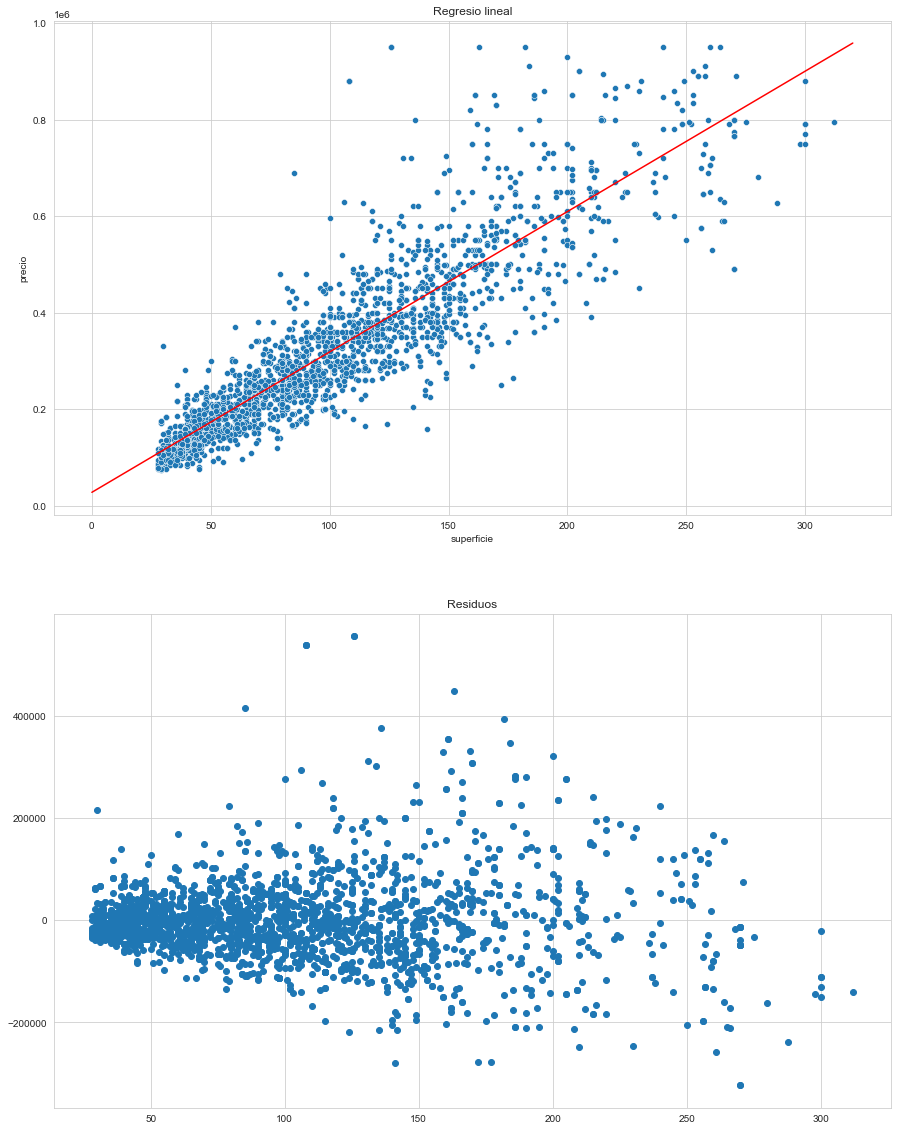

In [74]:
x_recta = np.linspace(0,320,100)

y_recta = model.params[1] * x_recta + model.params[0]

fig, ax = plt.subplots(2,figsize=(15,20))

ax[0].plot(x_recta, y_recta, c='r')
sns.scatterplot(x='superficie', y = 'precio', data=df[df['Barrio']=='Recoleta'], ax=ax[0])

ax[0].set_title('Regresio lineal')

ax[1].scatter(X['superficie'],residuos)
ax[1].set_title('Residuos')

<h2>Regresion Lineal Multiple</h2>

In [105]:
df = pd.read_csv('/Users/ezequieldjemdjemian/Documents/github/FIUBA_MachineLearning/Módulo 02 - Regresión Lineal Simple/Datasets/Aptos_BsAs_Todos.csv')

columnas = [*df.columns]

columnas.pop(-1)

columnas

['tipo', 'Barrio', 'cant_hab', 'cant_bath', 'superficie']

In [84]:
"""all_columns = ' + '.join(columnas)

formula = 'precio ~ ' + all_columns

formula
"""



"all_columns = ' + '.join(columnas)\n\nformula = 'precio ~ ' + all_columns\n\nformula\n"

In [112]:
formula = 'precio ~ '
columnas = [*df.columns]
columnas.pop(-1)

columnas_todas = ' + '.join(columnas)

modelo = smf.ols(formula + columnas_todas, data=df).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     2431.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:32:51   Log-Likelihood:            -5.7617e+05
No. Observations:               45904   AIC:                         1.152e+06
Df Residuals:                   45842   BIC:                         1.153e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   